<a href="https://colab.research.google.com/github/CarlosMello-AutomationsAI/Trab-SistemaReconhecimentoFacial/blob/main/Trab_SistemaReconhecimentoFacial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics tensorflow opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 60.4 MB/s eta 0:00:00


In [2]:
import cv2
from ultralytics import YOLO
import numpy as np
import tensorflow as tf


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
from google.colab import files
uploaded = files.upload()
img_path = next(iter(uploaded))


Saving Elenco-de-the-big-bang-theory-calcada-da-fama.jpg to Elenco-de-the-big-bang-theory-calcada-da-fama.jpg


In [4]:
model = YOLO('yolov8n.pt')  # Troque para yolov8n-face.pt se usar YOLO-Face


In [5]:
from google.colab import files
uploaded = files.upload()
img_path = next(iter(uploaded))


Saving Elenco-de-the-big-bang-theory-calcada-da-fama.jpg to Elenco-de-the-big-bang-theory-calcada-da-fama (1).jpg



image 1/1 /content/Elenco-de-the-big-bang-theory-calcada-da-fama (1).jpg: 448x640 9 persons, 5 ties, 147.0ms
Speed: 3.8ms preprocess, 147.0ms inference, 2.8ms postprocess per image at shape (1, 3, 448, 640)


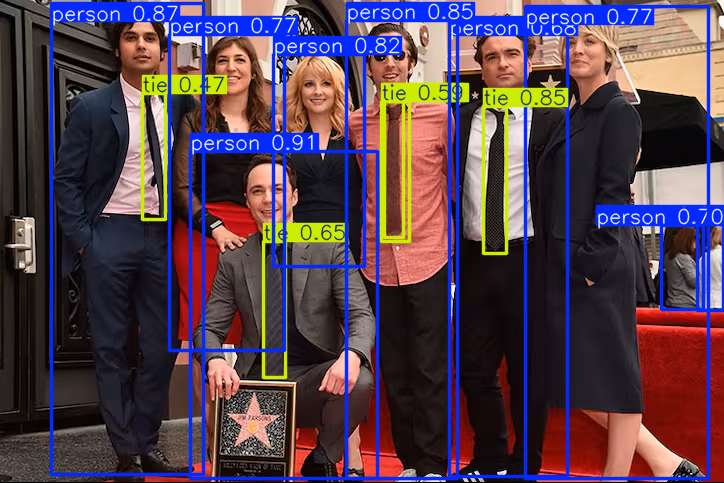

In [7]:
results = model(img_path)
results[0].show()  # Corrige o erro e exibe a imagem com as bounding boxes


In [8]:
image = cv2.imread(img_path)
for box in results[0].boxes.xyxy:
    x1, y1, x2, y2 = map(int, box)
    face = image[y1:y2, x1:x2]
    # Aqui você pode salvar ou processar cada face recortada


In [19]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
dataset_path = "/content/drive/My Drive/CarlosMello/Docs/IA/Cursos-DIO/MachineLearning/Trab-SistemaReconhecimentoFacial/Cleaned Dataset"


In [21]:
!pip install deepface
import cv2
import os
from deepface import DeepFace
import numpy as np
from matplotlib import pyplot as plt


In [22]:
model = YOLO('yolov8n.pt')  # Ou yolov8n-face.pt se estiver usando YOLO-Face


In [25]:
def carregar_embeddings(dataset_folder):
    pessoas = os.listdir(dataset_folder)
    embeddings_db = {}
    for pessoa in pessoas:
        caminho_pessoa = os.path.join(dataset_folder, pessoa)
        imagens = os.listdir(caminho_pessoa)
        embeddings_pessoa = []
        for img_name in imagens:
            img_path = os.path.join(caminho_pessoa, img_name)
            embedding = DeepFace.represent(img_path=img_path, model_name="Facenet", enforce_detection=False)
            embeddings_pessoa.append(embedding[0]['embedding'])
        embeddings_db[pessoa] = embeddings_pessoa
    return embeddings_db

embeddings_database = carregar_embeddings(dataset_path)
print("Embeddings carregados para:", list(embeddings_database.keys()))



Embeddings carregados para: ['leonard', 'raj', 'sheldon']


In [26]:
def extrair_faces_e_embeds(image_path, yolo_model):
    image = cv2.imread(image_path)
    results = yolo_model(image_path)
    faces_cropped = []
    boxes = []
    for box in results[0].boxes.xyxy:
        x1, y1, x2, y2 = map(int, box)
        face = image[y1:y2, x1:x2]
        faces_cropped.append(face)
        boxes.append((x1, y1, x2, y2))
    embeddings_faces = []
    for face in faces_cropped:
        embedding = DeepFace.represent(face, model_name="Facenet", enforce_detection=False)
        embeddings_faces.append(embedding[0]['embedding'])
    return boxes, embeddings_faces, image


In [27]:
from scipy.spatial.distance import cosine

def reconhecer_faces(embeddings_faces, embeddings_db, limiar=0.4):
    resultados = []
    for emb in embeddings_faces:
        nome = "Desconhecido"
        menor_dist = limiar
        for pessoa, embeds in embeddings_db.items():
            for e in embeds:
                dist = cosine(emb, e)
                if dist < menor_dist:
                    menor_dist = dist
                    nome = pessoa
        resultados.append(nome)
    return resultados



image 1/1 /content/drive/My Drive/CarlosMello/Docs/IA/Cursos-DIO/MachineLearning/Trab-SistemaReconhecimentoFacial/Elenco-de-the-big-bang-theory-calcada-da-fama.jpg: 448x640 9 persons, 5 ties, 341.9ms
Speed: 6.8ms preprocess, 341.9ms inference, 4.6ms postprocess per image at shape (1, 3, 448, 640)


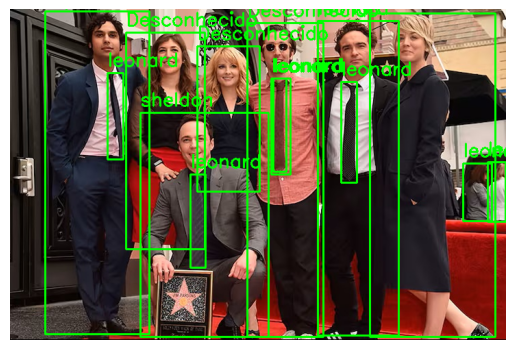

In [28]:
img_path = "/content/drive/My Drive/CarlosMello/Docs/IA/Cursos-DIO/MachineLearning/Trab-SistemaReconhecimentoFacial/Elenco-de-the-big-bang-theory-calcada-da-fama.jpg"

boxes, embeddings_faces, img = extrair_faces_e_embeds(img_path, model)
nomes = reconhecer_faces(embeddings_faces, embeddings_database)

for nome, (x1, y1, x2, y2) in zip(nomes, boxes):
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, nome, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
